In [1]:
pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
X=df[['age']]
y=df['fare']

In [5]:
X.isnull().sum()/len(X)*100

age    19.86532
dtype: float64

In [6]:
X["age"].fillna(X["age"].mean(),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12804\2535516736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age"].fillna(X["age"].mean(),inplace=True)


In [7]:
y.isnull().sum()/len(y)*100

0.0

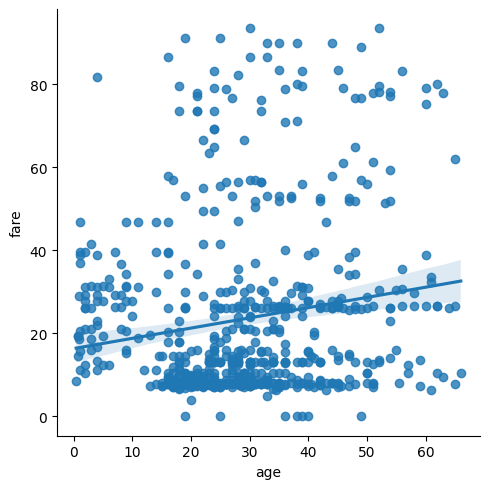

In [22]:
# plot the data between X and y using seaborn for lm plot
sns.lmplot(x='age',y='fare',data=df)



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: ylabel='age'>

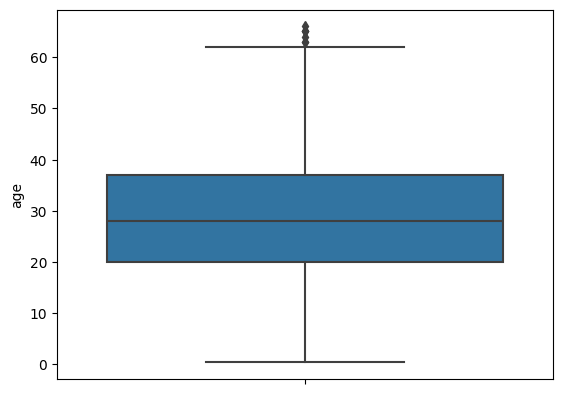

In [21]:
# Draw box plot of age
sns.boxplot(y='age',data=df)

In [14]:
# remove outliers from age
df=df[df['age']<70]

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: ylabel='fare'>

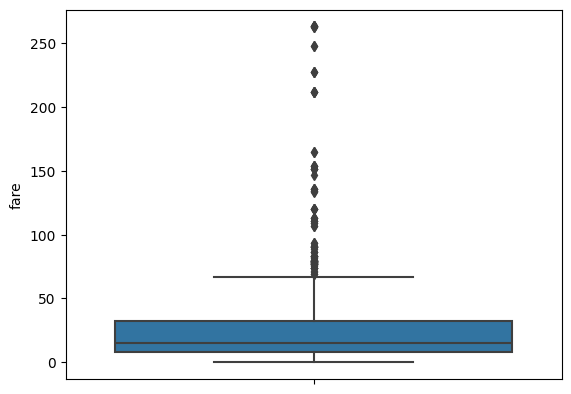

In [19]:
# Draw box plot of fare
sns.boxplot(y='fare',data=df)

In [20]:
# remove outliers from fare
df=df[df['fare']<100]

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
# split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [37]:
predictions=model.predict(X_test)

In [35]:
model.predict([[25]])

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([30.10840592])

In [2]:
#model evaluation
from sklearn.metrics import r2_score

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='fare'>

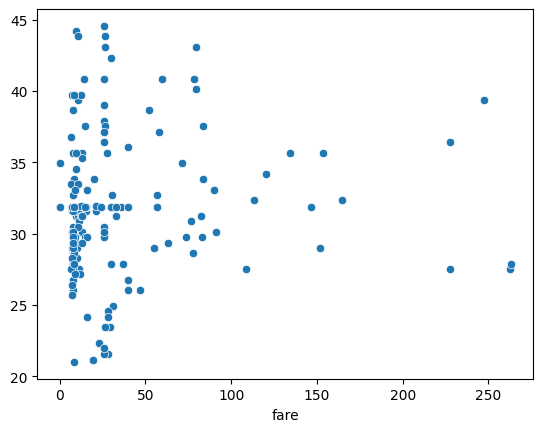

In [40]:
sns.scatterplot(x=y_test,y=predictions)

In [41]:
model.score(X_test,y_test)

0.0027300030602639414

In [4]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [45]:
MAE=mean_absolute_error(y_test,predictions)
MSE=mean_squared_error(y_test,predictions)

In [49]:
print(MAE)
print(MSE)


29.35083313461923
2285.656649372276


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [6]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
X=df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y=df['survived']

In [8]:
#convert categorical data into numerical data
X=pd.get_dummies(X, columns=['sex'])


In [9]:
X.isnull().sum()/len(X)*100

pclass         0.00000
age           19.86532
sibsp          0.00000
parch          0.00000
fare           0.00000
sex_female     0.00000
sex_male       0.00000
dtype: float64

In [10]:

from sklearn.model_selection import train_test_split

In [11]:
X["age"].fillna(X["age"].mean(),inplace=True)

In [12]:
model=DecisionTreeClassifier()

In [14]:
# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score, f1_score

In [19]:
predict=model.predict(X_test)

In [20]:
precision_score(y_test,predict)

0.7704918032786885